#  Modelo de ahorro

### Objetivos.
> #### Objetivo general.
> - Crear un modelo de ahorros que satisfaga las necesidades del cliente mediante el uso de ecuaciones diferenciales.

> #### Objetivos específicos.
> - Utilizar la solución analítica de ecuaciones diferenciales para llegar a un resultado satisfactorio.
> - Utilizar la solución numérica con uso de tecnología para llegar a un resultado satisfactorio.
> - Comparar ambas soluciones y sus resultados, para ver el error generado por la solución numérica.

###  Problema

Emilio tiene $1'500,000.00 pesos mexicanos que quiere invertir para comprar un bien inmueble en el futuro. 
Dicho fondo de inversión paga una tasa de interés continua del 8.60% anual.

Emilio no está seguro si en el futuro querrá comprar una casa o un departamento con bien inmueble, por lo que busca diferentes opciones. Las dos opciones que más le agradó son las siguientes:

> - Torre Altra Colomos Providencia Guadalajara Jalisco.
    **Precio = MN 3,150,000.00**
    <img src="https://img10.naventcdn.com/avisos/resize/18/00/60/65/30/45/1200x1200/273661316.jpg">
    Fuente: Inmuebles24
    
> - Casa Chapalita Zapopan Jalisco.
    **Precio = MN 6,795,000.00**
    <img src="https://img10.naventcdn.com/avisos/resize/18/00/65/40/46/40/1200x1200/341358888.jpg">
    Fuente: Inmuebles24
    
Para tomar una decisión, Emilio desea saber cuánto tiempo tardará en conseguir el dinero suficiente para comprar dichas viviendas. Y también definir si es buena idea invertir todo ese tiempo para pagar de contado.


###  Modelo que representa el problema.

Para saber el precio final de una inversión capitalizable continuamente, tenemos que hacer uso de una ecuación diferencial que defina el cambio del capital con respecto al tiempo. 
Posteriormente, podremos realizar una solución analítica y una numérica para ambas viviendas con el mismo tipo de inversión.

### Procedimiento
> - 1-Definir el valor de las viviendas en el futuro. 
      "De acuerdo con el Índice de Mercado Inmobiliario Estadístico (IMIE) del primer cuatrimestre de 2022 (1C2022), elaborado por Tinsa, el precio promedio por metro cuadrado (m²) de la vivienda en México fue de 19,270 pesos/m²; lo que representa un crecimiento anual del 3.4 por ciento." (Hernández, 2022)
    Podemos usar estos datos para hacer una proyección a futuro del valor de las viviendas.

> - 2-Definir un modelo que represente el valor final de nuestra inversión.

> - 2.1-Al ser una tasa continua, podemos decir que la razón del crecimiento de nuestro capital a lo largo del tiempo es igual a nuestro capital por la tasa de interés. Donde S es capital:

$$\frac{dS}{dt} = r*S$$
    

> - 2.2-Al despejar el capital de un solo lado, tenemos que: $\frac{dS}{S} = r*dt$

> - 2.3-Si integramos dicha ecuación para resolver las derivadas:  $\int \frac{dS}{S} = r* \int dt$

> - 2.4-Tenemos que: $\ln{S} = r * t + C$

> - 2.5-Al despejar para S (Capital final): $S = e^{rt}*e^C$

> - 2.6-Que es igual a:

$$S = Ce^{rt}$$

> - Donde:
    - S es capital final
    - C es capital inicial 
    - r es la tasa de interés
    - t es el tiempo

> - 3-Usar este modelo para obtener el tiempo de inversión para ambas viviendas. 

> - 5-Usar la librería Scipy para obtener otra solución y comparar su resultado. 

> - 6-Graficar los resultados y sus comparaciones.



### Simulación del problema y visualización de resultados

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [126]:
def precio(S):
    return (S * 0.034) + S

In [127]:
departamento = [3150000]
casa = [6795000]
años = [2022]
for i in range(25):
    preciocasa = precio(casa[-1])
    casa.append(preciocasa)
    preciodepa = precio(departamento[-1])
    departamento.append(preciodepa)
    años.append(años[-1]+1)

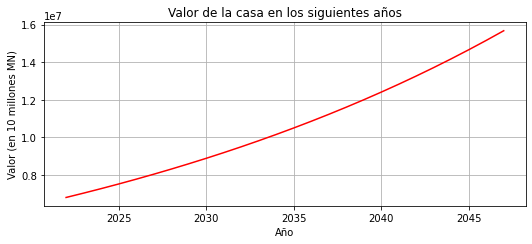

In [128]:
plt.figure()
plt.title("Valor de la casa en los siguientes años")
plt.ylabel("Valor (en 10 millones MN)")
plt.xlabel("Año")
plt.plot(años, casa, "r")
plt.grid()

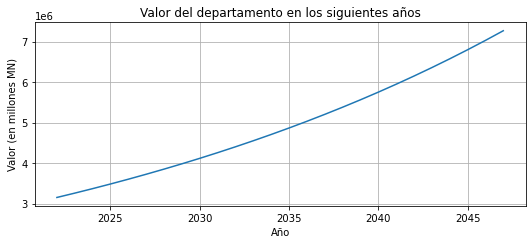

In [129]:
plt.figure()
plt.title("Valor del departamento en los siguientes años")
plt.ylabel("Valor (en millones MN)")
plt.xlabel("Año")
plt.plot(años, departamento)
plt.grid()

In [130]:
def sol(S, t, r):
    return S *np.exp(r * t)

In [131]:
tiempo = np.linspace(0, 25, 26)
capital = 1500000
r = 0.106
inversion = sol(capital, tiempo, r)
inversion

array([ 1500000.        ,  1667732.8147598 ,  1854221.82761776,
        2061564.39184134,  2292092.39067609,  2548398.46292783,
        2833365.16113877,  3150197.37028554,  3502458.35159681,
        3894109.81685833,  4329556.48390194,  4813695.61437287,
        5351972.0909033 ,  5950439.65311869,  6615828.98116929,
        7355623.39248993,  8178143.00311349,  9092638.3000604 ,
       10109394.1771683 , 11239845.60440346, 12496706.23153154,
       13894111.37249225, 15447776.97855506, 17175176.38815147,
       19095736.84120524, 21231057.9680637 ])

In [132]:
def f(S, t, r):
    return r*S

In [133]:
inversion2 = odeint(f, capital, tiempo, args=(r,))
inversion2 = inversion2[:,0]
inversion2

array([ 1500000.        ,  1667732.8023758 ,  1854221.81826845,
        2061564.38227311,  2292092.38224082,  2548398.45754392,
        2833365.19478983,  3150197.4224641 ,  3502458.39201   ,
        3894109.8696573 ,  4329556.54552636,  4813695.68926074,
        5351972.17986222,  5950439.75826469,  6615829.1358537 ,
        7355623.56999259,  8178143.18873945,  9092638.49047961,
       10109394.39947936, 11239845.85926862, 12496706.52257609,
       13894111.70849263, 15447777.3676826 , 17175176.83123666,
       19095737.35313968, 21231058.59984015])

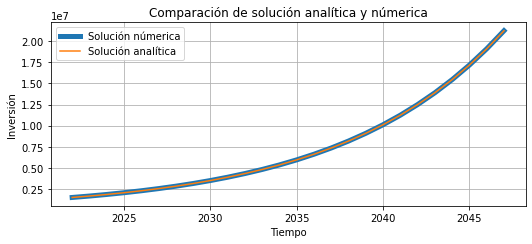

In [134]:
plt.figure()
plt.title("Comparación de solución analítica y númerica")
plt.ylabel("Inversión")
plt.xlabel("Tiempo")
plt.plot(tiempo+2022, inversion2, lw=5, label="Solución númerica")
plt.plot(tiempo+2022, inversion, label="Solución analítica")
plt.legend()
plt.grid()

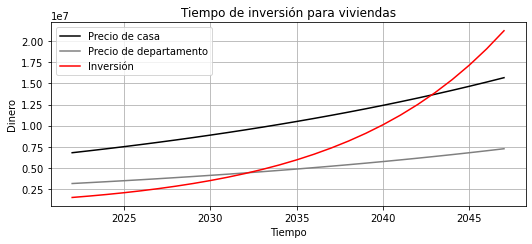

In [135]:
plt.figure()
plt.title("Tiempo de inversión para viviendas")
plt.ylabel("Dinero")
plt.xlabel("Tiempo")
plt.plot(tiempo+2022, casa, "black", label="Precio de casa")
plt.plot(tiempo+2022, departamento, "gray", label="Precio de departamento")
plt.plot(tiempo+2022, inversion2, "r", label="Inversión")
plt.legend()
plt.grid()

In [141]:
print("Precio de departamento en 2033: " + str(departamento[11]))
print("Inversión en 2033: " + str(inversion2[11]))

Precio de departamento en 2033: 4550262.801135194
Inversión en 2033: 4813695.6892607445


**Como podemos observar en la gráfica, para poder comprar el departamento, debe ahorrar 11 años, o sea que en 2033 tendrá 4,813,695.68 MN y podrá pagar el valor del departamento de 4,550,262.80 MN**

In [144]:
print("Precio de casa en 2043: " + str(casa[21]))
print("Inversión en 2043: " + str(inversion2[21]))

Precio de casa en 2043: 13712630.541053604
Inversión en 2043: 13894111.708492635


**Como podemos observar en la gráfica, para poder comprar la casa, debe ahorrar 21 años, o sea que en 2043 tendrá 13,894,111.70 MN y podrá pagar el valor de la cas de 13,712,630.00 MN**

###  Conclusiones
A medida que se simuló el modelo planteado, se pueden sacar las siguientes conclusiones:
> - Las ecuaciones diferenciales pueden ser aplicadas en el modelo de ahorros para definir el rendimiento que un capital va a tener a lo largo del tiempo. Además, se puede hacer uso de la simulación para hacer la solución más rápida sin necesidad de desarrollar analíticamente, ya que como podemos observar, la diferencia de la simulación con el valor real es casi mínima.

> - Si bien se llevaron a cabo los cálculos para que Emilio sepa cuanto tiempo tiene que invertir para comprar una casa o un departamento, gracias a esta simulación podemos ver que ese modelo no es nada eficiente. Esperar 21 años para comprar una casa de contado, siendo que se tiene millón y medio de capital inicial, no es una buena idea. Lo mejor sería recomendarle a Emilio que contraté un crédito, el cual lo puede usar para comprar una casa a cierto plazo de pago, pero con el bien adueñado y sin el aumento de vivienda a futuro.

### Referencias
Hernández, F. (2022, 30 mayo). Crece 3.4% precio de la vivienda en México durante el 1C2022. Centro Urbano. https://centrourbano.com/sin-categoria/crece-precio-vivienda-1c2022/

inmuebles24. (2022). Torre Altra Colomos. https://www.inmuebles24.com/propiedades/torre-altra-colomos-providencia-guadalajara-jalisco-60653045.html

inmuebles24. (2022). Nueva casa en venta. https://www.inmuebles24.com/propiedades/nueva-casa-en-venta-3-recamaras-chapalita-zapopan-65404640.html